In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/diabetes_dataset.csv')
data.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [4]:
data.isna().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


On commence par vérifier le type de chaque variable ainsi que les valeurs manquantes. 
Nous allons procéder par remplacer les objects par des int.

In [5]:
data['smoking_status'].value_counts()

smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64

In [6]:
mappings = {}
data_cat = data.copy()

for col in data.columns:
    if data[col].dtype == 'object':
        cat_col = data[col].astype('category')
        mappings[col] = dict(enumerate(cat_col.cat.categories))
        data_cat[col] = cat_col.cat.codes
        
data_cat.head()

age  gender  ethnicity  education_level  income_level  employment_status  \
0   58       1          0                1             2                  0   
1   48       0          4                1             3                  0   
2   60       1          2                1             3                  3   
3   74       0          1                1             1                  1   
4   46       1          4                0             3                  1   

   smoking_status  alcohol_consumption_per_week  \
0               2                             0   
1               1                             1   
2               2                             1   
3               2                             0   
4               2                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6               4   
1           2.00   5.63                 23.0               1   
2           5.07   7.51                 44.7               4   
3           5.28   9.03                 38.2               4   
4          12.74   7.20                 23.5               4   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [7]:
mappings

{'gender': {0: 'Female', 1: 'Male', 2: 'Other'},
 'ethnicity': {0: 'Asian', 1: 'Black', 2: 'Hispanic', 3: 'Other', 4: 'White'},
 'education_level': {0: 'Graduate',
  1: 'Highschool',
  2: 'No formal',
  3: 'Postgraduate'},
 'income_level': {0: 'High',
  1: 'Low',
  2: 'Lower-Middle',
  3: 'Middle',
  4: 'Upper-Middle'},
 'employment_status': {0: 'Employed',
  1: 'Retired',
  2: 'Student',
  3: 'Unemployed'},
 'smoking_status': {0: 'Current', 1: 'Former', 2: 'Never'},
 'diabetes_stage': {0: 'Gestational',
  1: 'No Diabetes',
  2: 'Pre-Diabetes',
  3: 'Type 1',
  4: 'Type 2'}}

Cela va nous permettre d'intégrer ces valeurs par la suite dans nos modèles.


On print une vision un peu générale de la dataset

In [8]:
data_cat.describe()

age         gender      ethnicity  education_level  \
count  100000.00000  100000.000000  100000.000000     100000.00000   
mean       50.12041       0.517970       2.533270          1.00007   
std        15.60460       0.538461       1.490126          1.00013   
min        18.00000       0.000000       0.000000          0.00000   
25%        39.00000       0.000000       1.000000          0.00000   
50%        50.00000       0.000000       3.000000          1.00000   
75%        61.00000       1.000000       4.000000          1.00000   
max        90.00000       2.000000       4.000000          3.00000   

        income_level  employment_status  smoking_status  \
count  100000.000000      100000.000000    100000.00000   
mean        2.500500           0.698070         1.39637   
std         1.115371           1.024099         0.80174   
min         0.000000           0.000000         0.00000   
25%         2.000000           0.000000         1.00000   
50%         3.000000           0.000000         2.00000   
75%         3.000000           1.000000         2.00000   
max         4.000000           3.000000         2.00000   

       alcohol_consumption_per_week  physical_activity_minutes_per_week  \
count                 100000.000000                       100000.000000   
mean                       2.003670                          118.911640   
std                        1.417779                           84.409662   
min                        0.000000                            0.000000   
25%                        1.000000                           57.000000   
50%                        2.000000                          100.000000   
75%                        3.000000                          160.000000   
max                       10.000000                          833.000000   

          diet_score  ...  hdl_cholesterol  ldl_cholesterol  triglycerides  \
count  100000.000000  ...    100000.000000    100000.000000  100000.000000   
mean        5.994787  ...        54.042790       103.000430     121.462650   
std         1.780954  ...        10.267374        33.390256      43.372619   
min         0.000000  ...        20.000000        50.000000      30.000000   
25%         4.800000  ...        47.000000        78.000000      91.000000   
50%         6.000000  ...        54.000000       102.000000     121.000000   
75%         7.200000  ...        61.000000       126.000000     151.000000   
max        10.000000  ...        98.000000       263.000000     344.000000   

       glucose_fasting  glucose_postprandial  insulin_level          hba1c  \
count     100000.00000         100000.000000  100000.000000  100000.000000   
mean         111.11712            160.035050       9.061242       6.520776   
std           13.59561             30.935472       4.954060       0.813921   
min           60.00000             70.000000       2.000000       4.000000   
25%          102.00000            139.000000       5.090000       5.970000   
50%          111.00000            160.000000       8.790000       6.520000   
75%          120.00000            181.000000      12.450000       7.070000   
max          172.00000            287.000000      32.220000       9.800000   

       diabetes_risk_score  diabetes_stage  diagnosed_diabetes  
count        100000.000000    100000.00000       100000.000000  
mean             30.222362         3.11133            0.599980  
std               9.061505         1.11717            0.489904  
min               2.700000         0.00000            0.000000  
25%              23.800000         2.00000            0.000000  
50%              29.000000         4.00000            1.000000  
75%              35.600000         4.00000            1.000000  
max              67.200000         4.00000            1.000000  

[8 rows x 31 columns]

In [9]:
data.shape

(100000, 31)

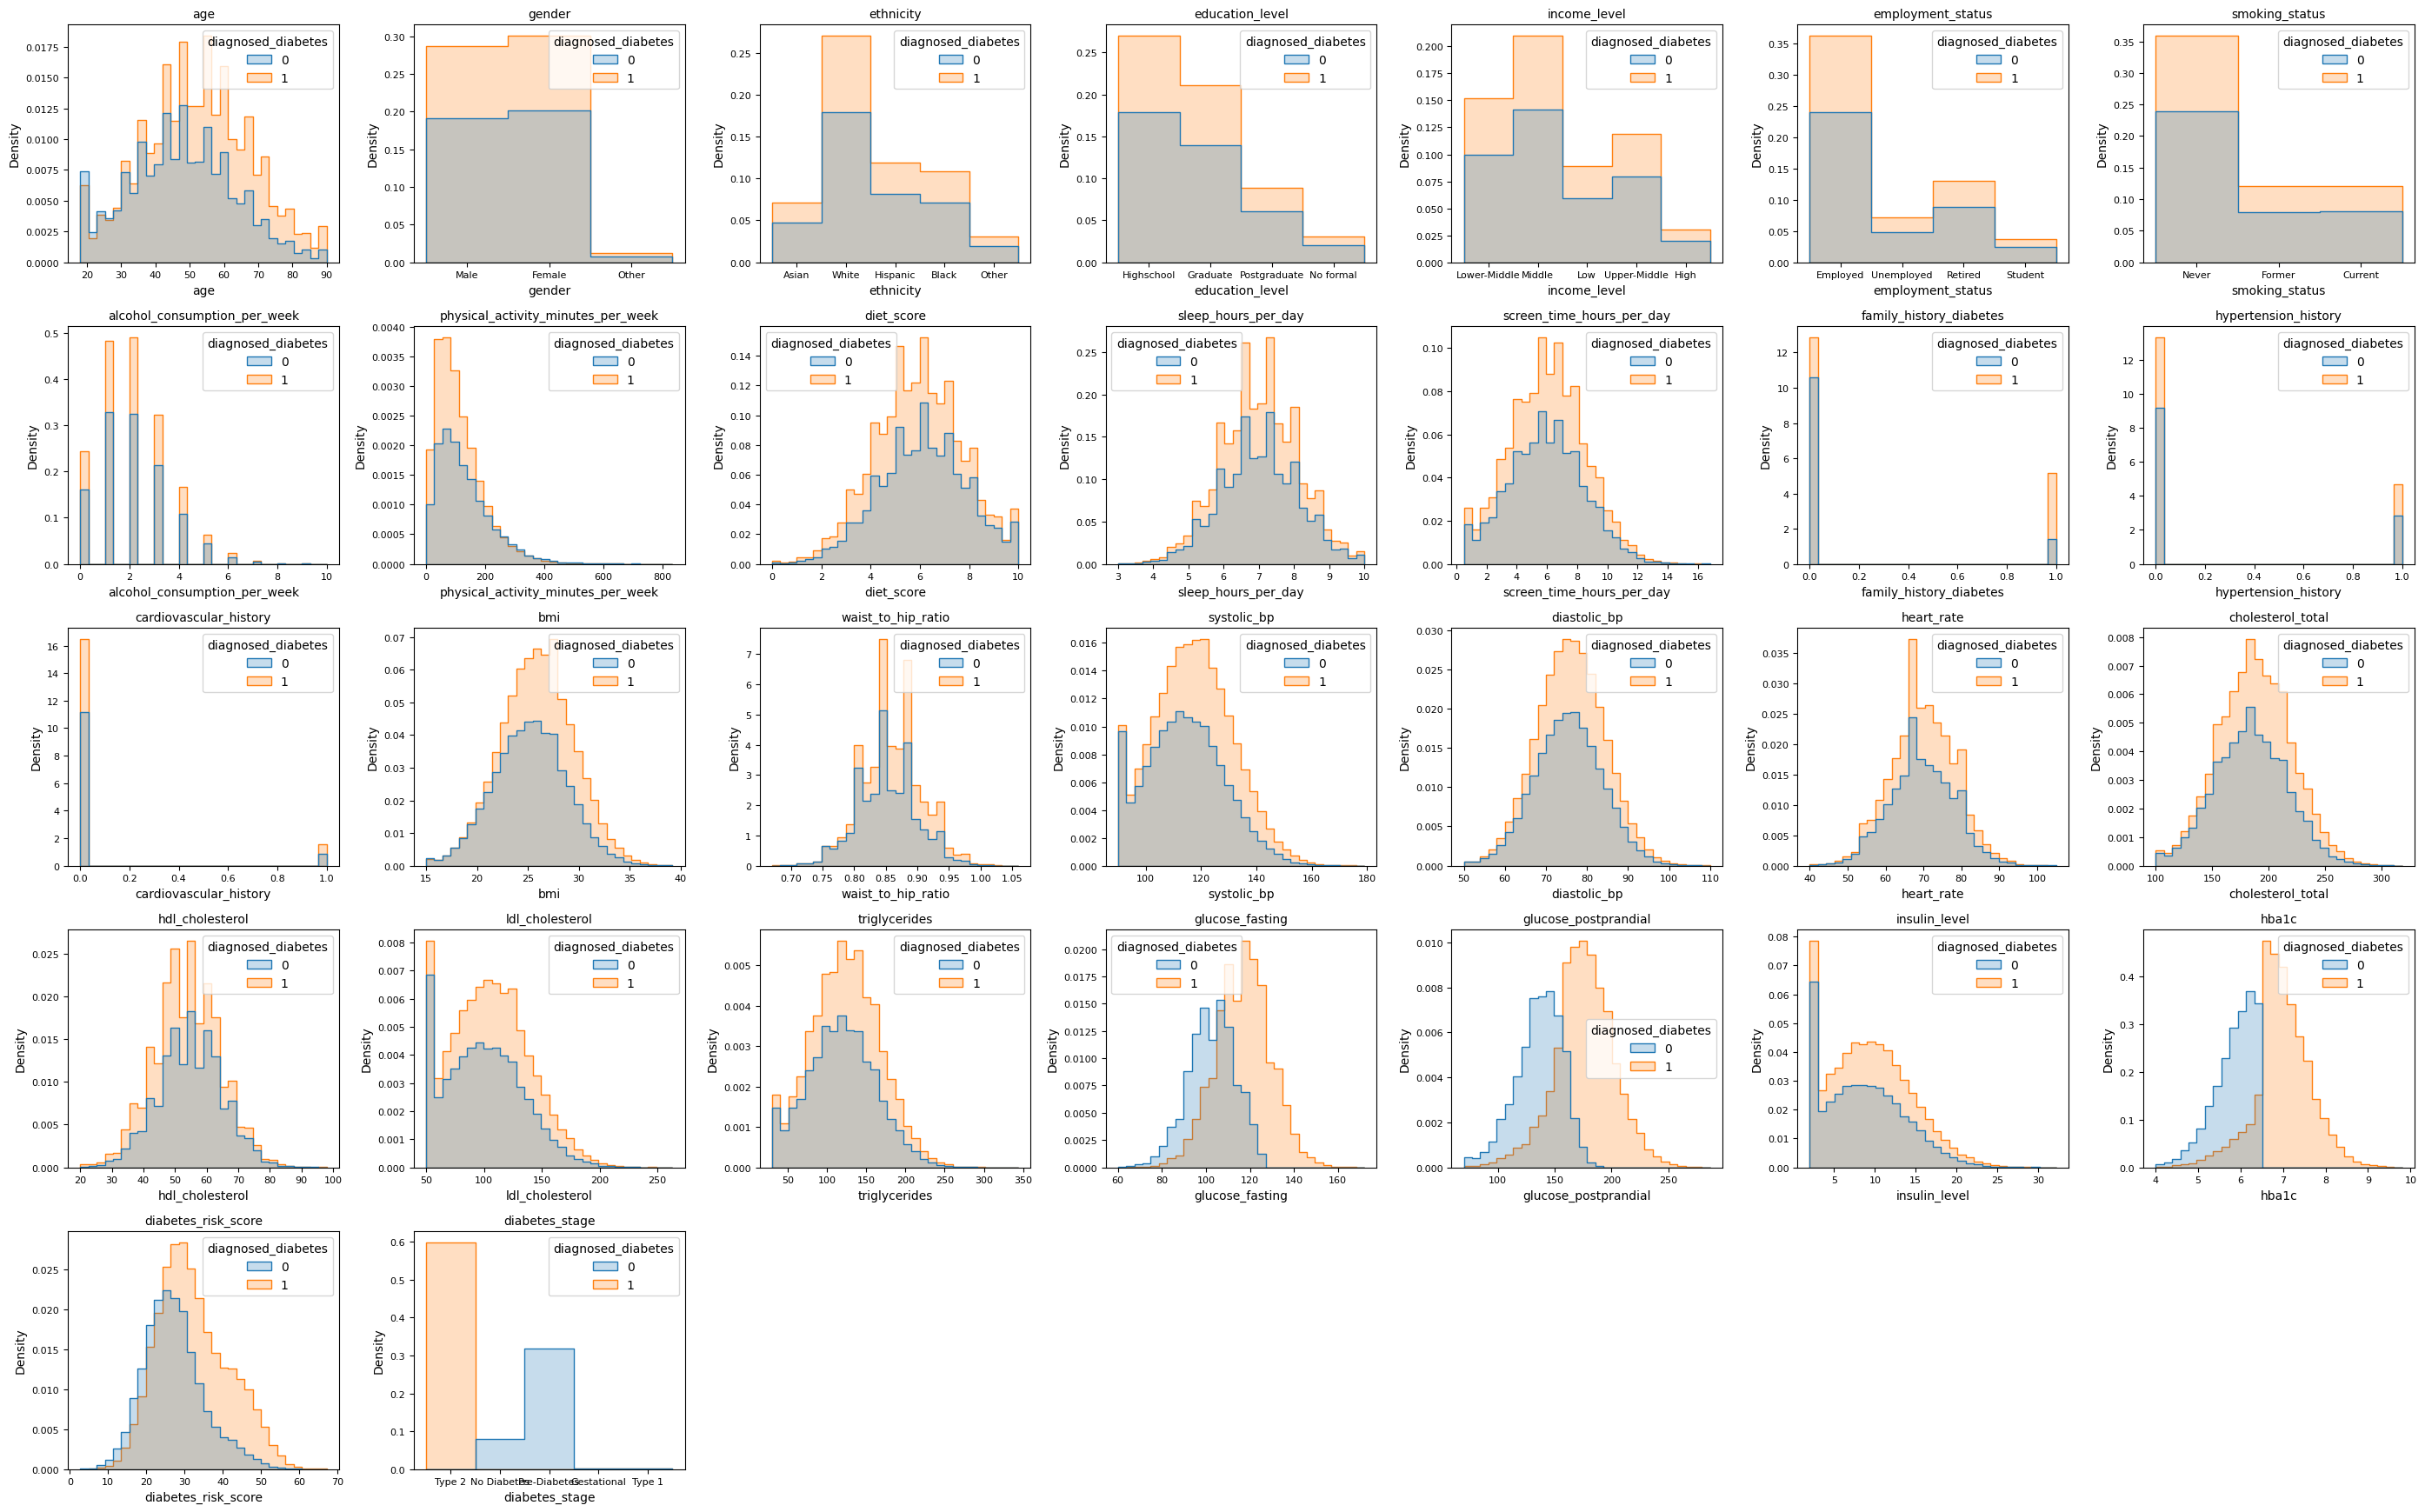

In [10]:
import math

cols = [c for c in data.columns if c != 'diagnosed_diabetes']

n_cols = 7
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(4*n_cols, 3.5*n_rows))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.histplot(
        data=data,
        x=col,
        hue='diagnosed_diabetes',
        stat='density',
        element='step',
        bins=30,     
        ax=ax
    )
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

## Premières analyses

On peut ici catégoriser les variables en 5 parties:

### 1. **<i>Variables démographiques</i>**

Les personnes diagnostiquées diabétiques sont nettement plus âgées en moyenne.

Le genre semble peu discriminant.

Certaines catégories ethniques pourraient montrer de légères variations, mais rien de massif dans l'histogramme.
 
### 2. **<i>Statut socio-économique</i>**

Les distributions pour les niveaux d'éducation, revenu et emploi se chevauchent fortement.

Les diabétiques semblent un peu plus représentés dans les catégories d'éducation plus basses ou revenu plus faible, mais cela reste négligeable.

### 3. **<i>Habitudes de vie</i>**

Les diabétiques font un peu moins d'activité physique.

Les diabétiques ont un score alimentaire légèrement plus faible.

Pas d'impact clair pour le sommeil et le temps d'écran.

Le tabac et l'alcool ont des comportements très proches.

On peu conclure que les comportements de santé influencent de façon modérée le diabète.

### 4. **<i>Antécédents médicaux</i>**

<b>Historique familial : </b>

Les diabétiques ont bien plus souvent un parent diabétique.

<b>Hypertension / Historique cardiovasculaire : </b> 

Les diabétiques présentent des taux nettement plus élevés d'hypertension et antécédents cardiovasculaires.

### 5. **<i>Variables cliniques et biologiques</i>**

**IMC, waist-to-hip ratio :**

Le surpoids/obésité ainsi que l'obésité abdominale sont fortement liés au diabète.

**Pression artérielle :**

Les personnes diabétiques ont une pression plus élevée en moyenne.

**Cholestérol/HDL/LDL/Triglcérides :**

- Triglycérides plus élevés chez les diabétiques.
- HDL plus bas.
- LDL et cholestérol montre des différences plus modérées.

**Glucose fasting & postprandial :**

Différence massives ! 

- *Jeûne :* distribution des diabétiques très décalée vers le haut.
- *Postprandial :* même constat, encore plus marqué

*Variables les plus discriminantes de tout le dataset.*

**Insulin levels :**

Niveaux plus élevées pour les diabétiques.

**HbA1c :**

Très clairement plus élevée pour les diabétique -> logique car critère diagnostique.

**Diabetes risk score :**

Très bon séparateur.


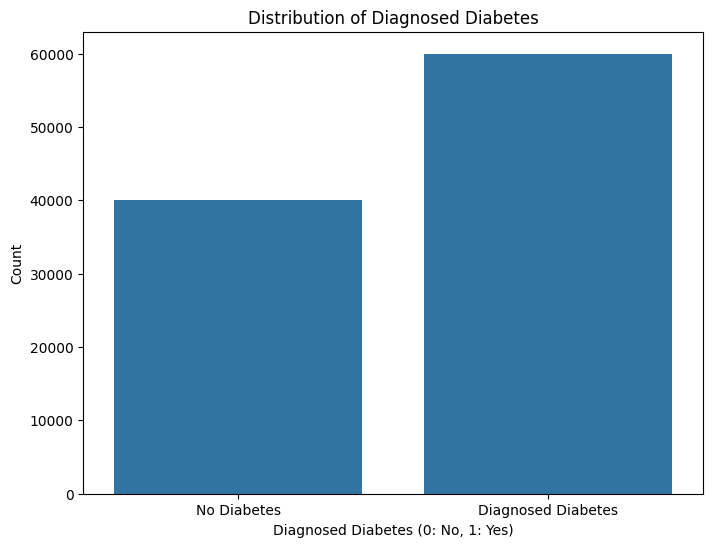

In [11]:
diabetes_counts = data_cat['diagnosed_diabetes'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values)
plt.title('Distribution of Diagnosed Diabetes')
plt.xlabel('Diagnosed Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diagnosed Diabetes'])
plt.show()

On observe un léger déséquilibre

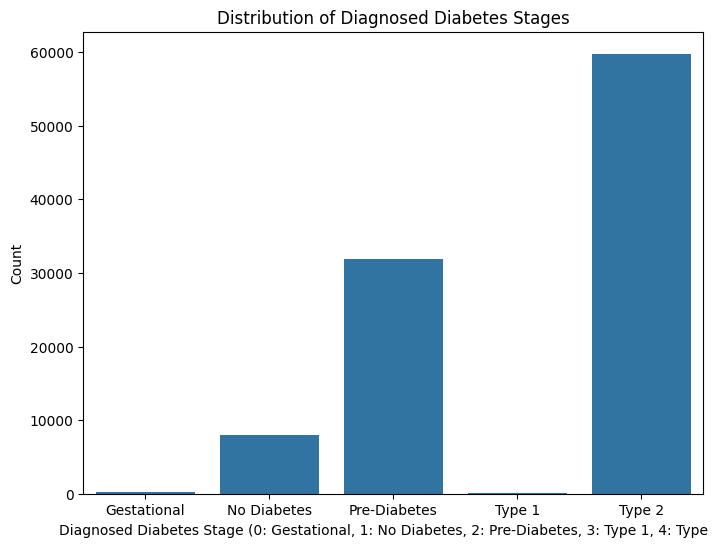

In [12]:
diabetes_counts = data_cat['diabetes_stage'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values)
plt.title('Distribution of Diagnosed Diabetes Stages')
plt.xlabel("Diagnosed Diabetes Stage (0: Gestational, 1: No Diabetes, 2: Pre-Diabetes, 3: Type 1, 4: Type 2)")
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Gestational', 'No Diabetes', 'Pre-Diabetes', 'Type 1', 'Type 2'])
plt.show()

On observe un gros déséquilire entre les classes

In [13]:
diabetes_counts

diabetes_stage
4    59774
2    31845
1     7981
0      278
3      122
Name: count, dtype: int64

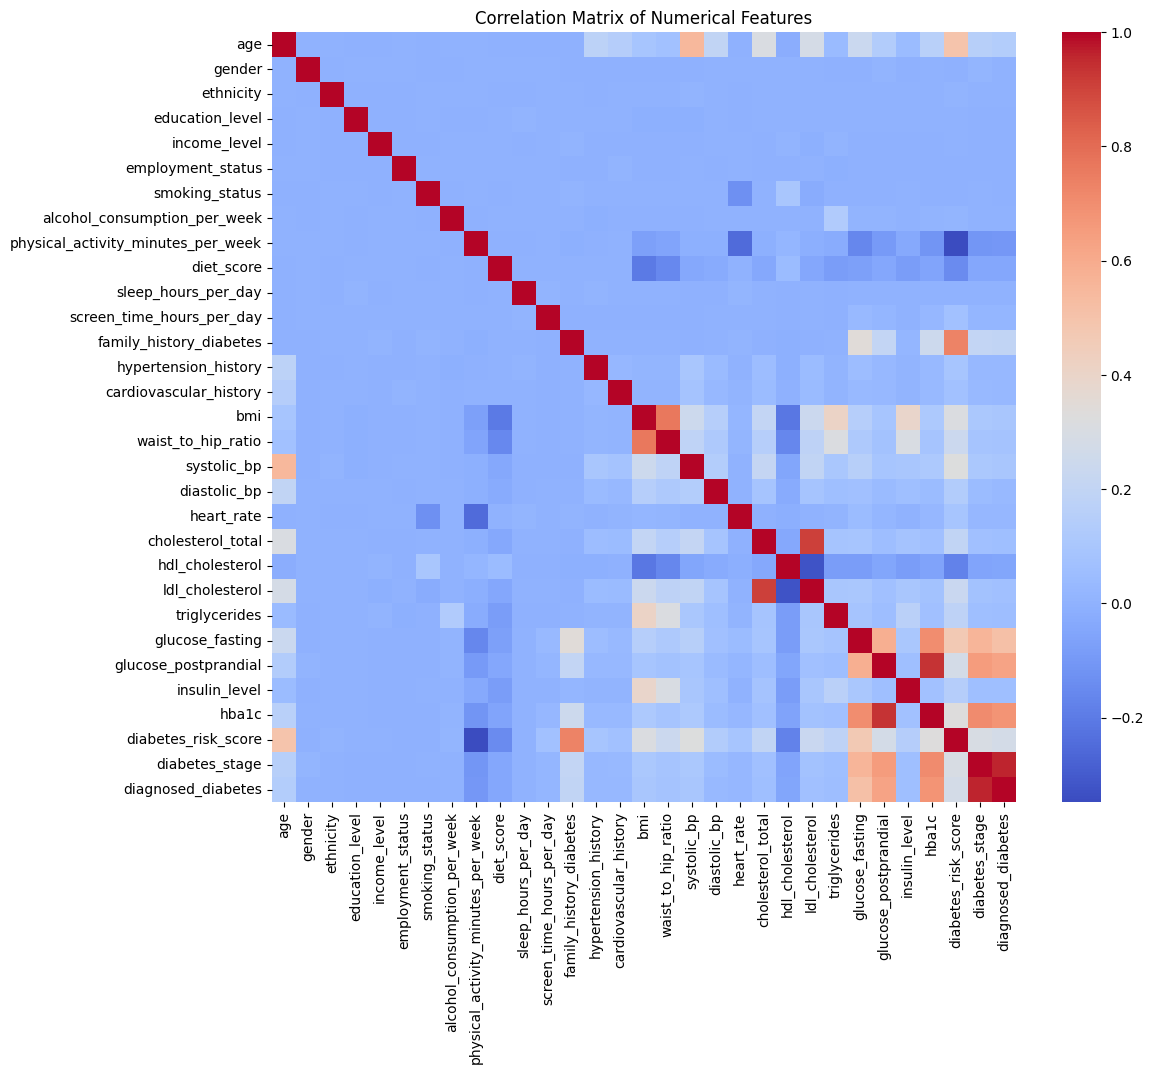

In [14]:
numerical_df = data_cat.select_dtypes(include=[np.number])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

On observe que certaines variables sont fortement corrélées notament glucose_postprandial et hbalc (qui est le taux d'hémoglobine glyquée) ainsi que cholesterol_total et ldl_cholesterol (puisque le total est la somme des cholesterols ldl et hdl).

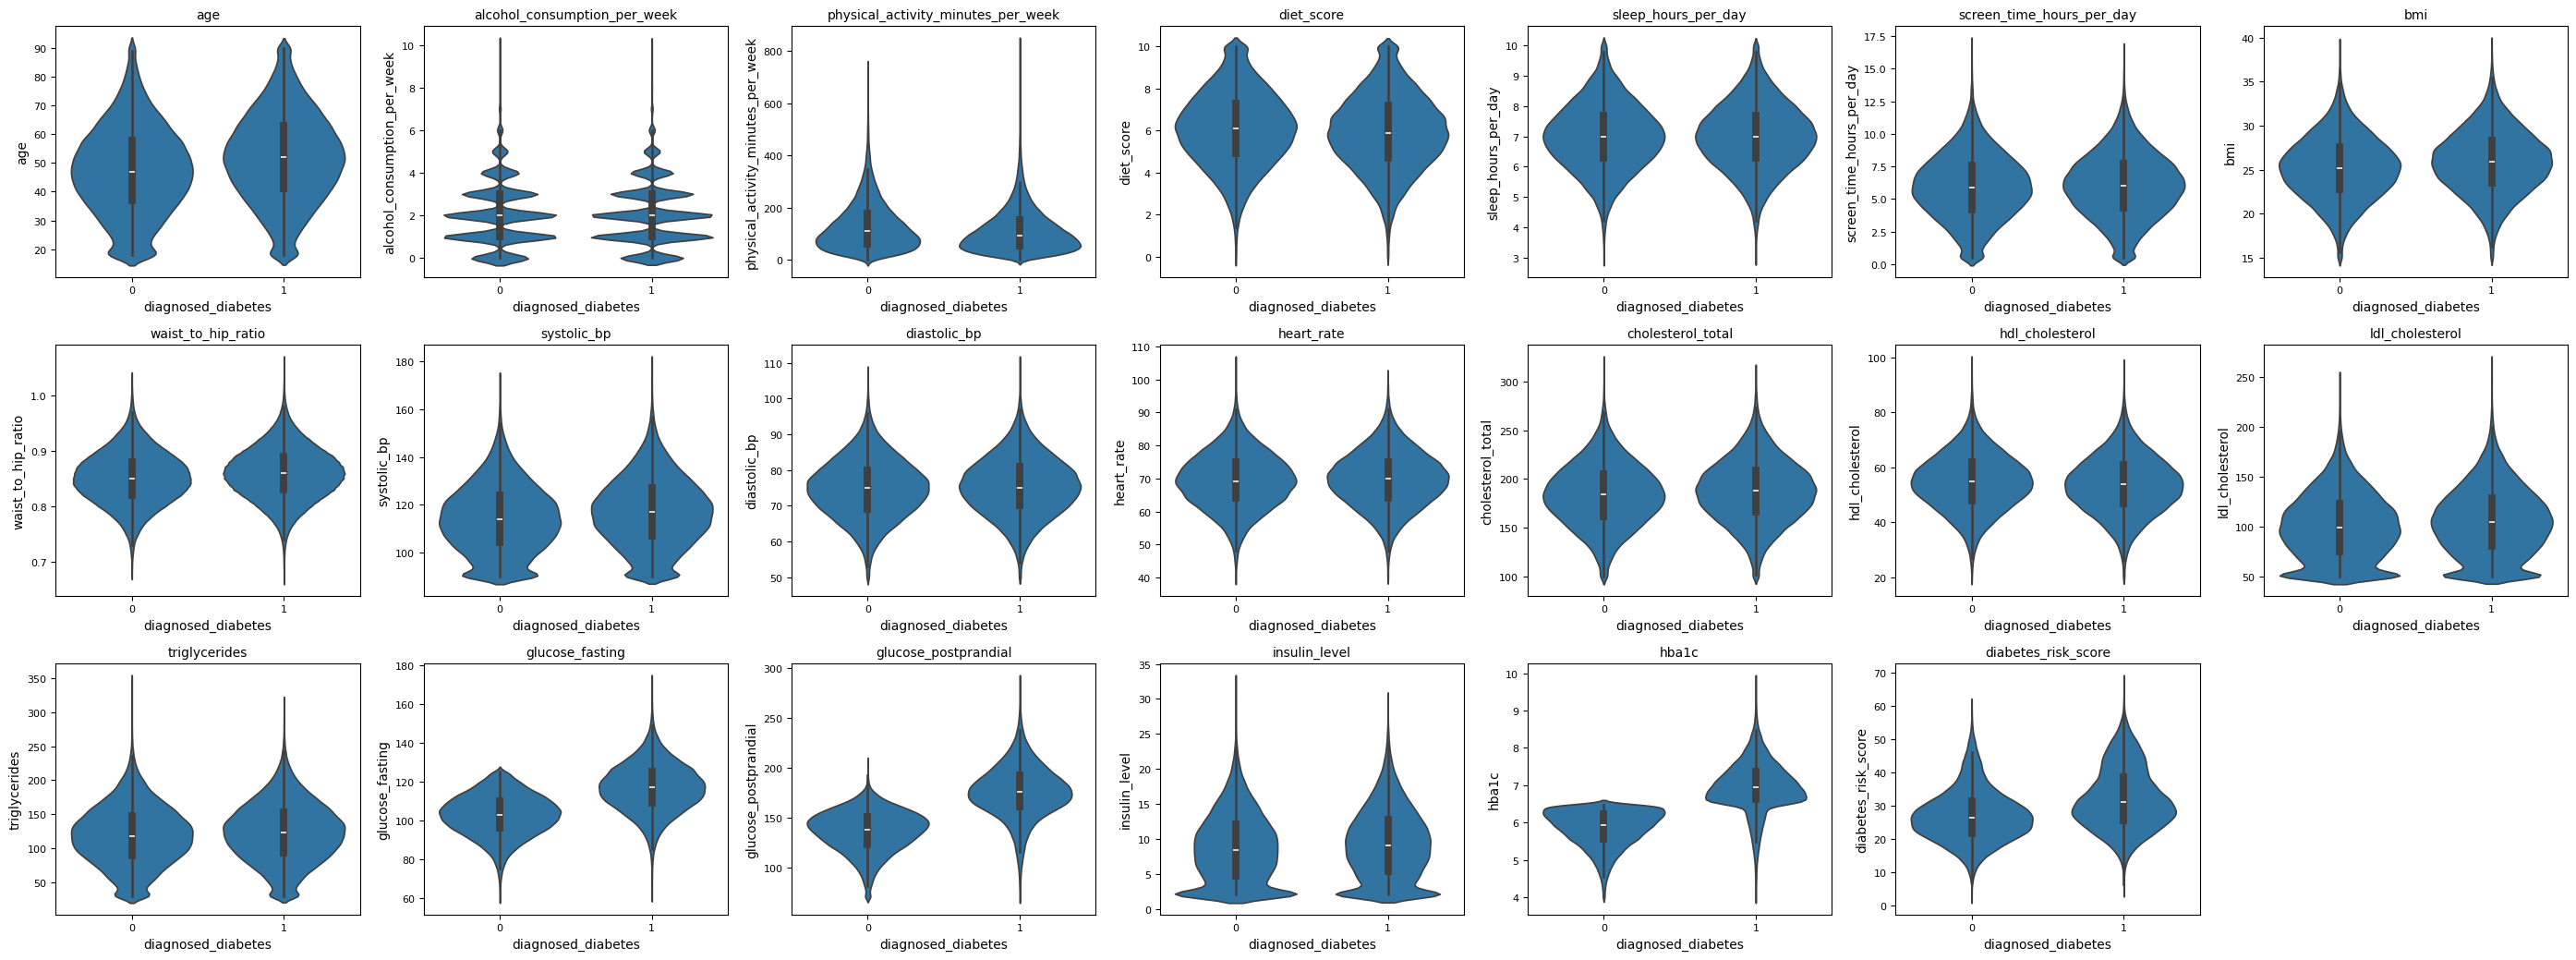

In [24]:
import math

cols = [c for c in data.columns 
        if c != 'diagnosed_diabetes' and data[c].nunique() > 5]

n_cols = 7
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(4*n_cols, 3.5*n_rows))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    
    # Boxplot : distribution de chaque variable selon la cible
    sns.violinplot(
        data=data,
        x='diagnosed_diabetes',
        y=col,
        ax=ax
    )
    
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.savefig('diabetes_violinplots.png', dpi=300)
plt.show()


Les distributions liées aux habitudes de vie, comme la consommation d'alcool, les heures de sommeil ou le temps d'écran, sont assez semblables entre les deux groupes. En revanche, les caractéristiques physiques montrent des différences marquées : les personnes diagnostiquées présentent un âge, un IMC et un tour de taille nettement plus élevés. La pression artérielle, tant systolique que diastolique, est globalement plus haute chez les diabétiques, tout comme le rythme cardiaque qui montre une légère élévation.

Sans surprise, les marqueurs glycémiques (glucose à jeun, glucose postprandial et taux d'HbA1c) montrent une augmentation massive et visible chez le groupe diagnostiqué, avec des distributions clairement séparées de celles des non-diabétiques. Les lipides (le cholestérol total, le LDL et les triglycérides) suivent cette tendance à la hausse, tandis que le HDL tend à être légèrement plus bas. Enfin, les niveaux d’insuline et la prédisposition génétique (diabetes pedigree function) affichent une dispersion et des médianes supérieures chez les patients diagnostiqués, suggérant une forte influence de ces facteurs biologiques.

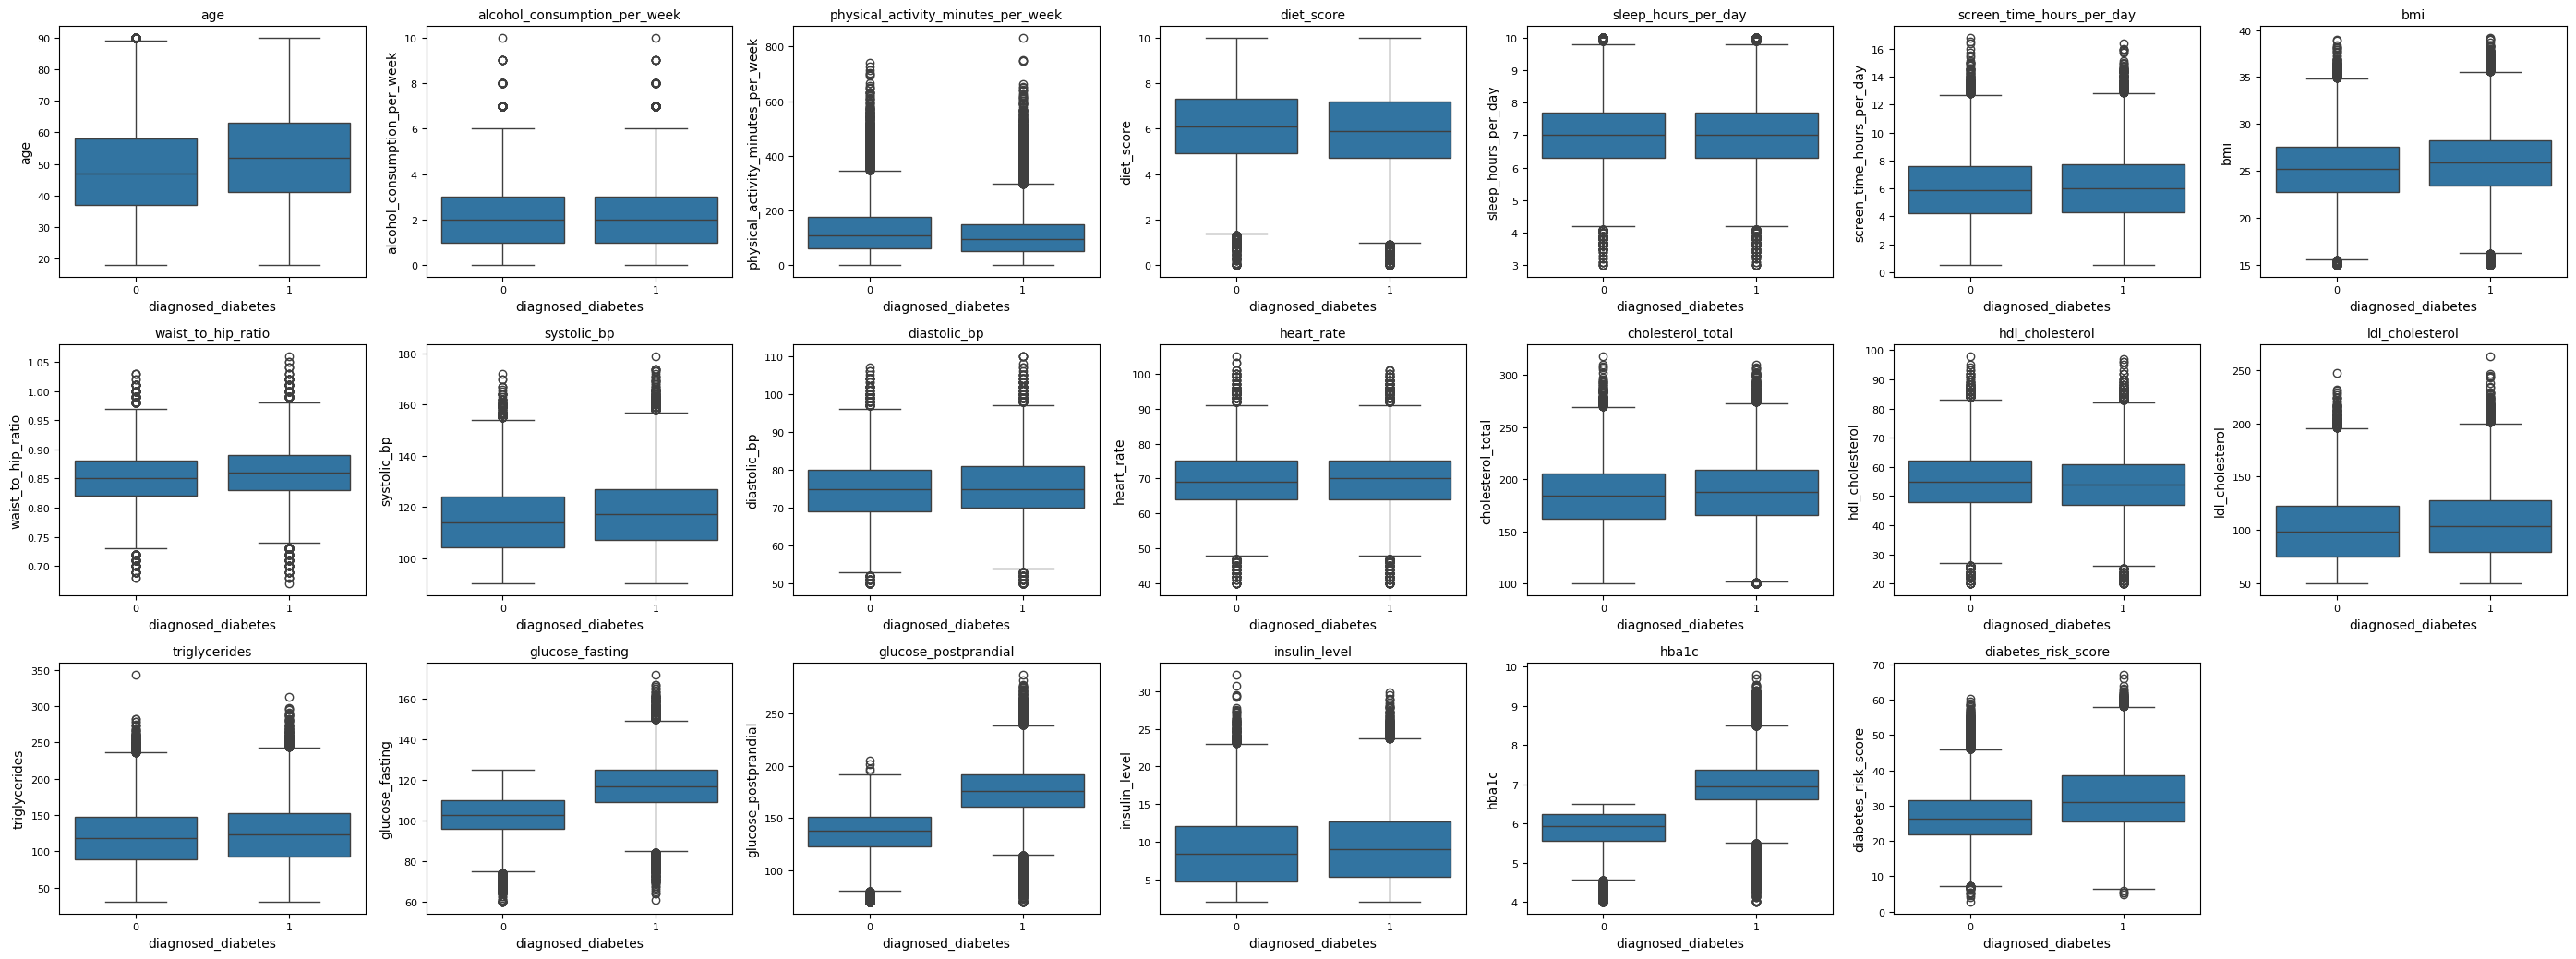

In [28]:
import math

cols = [c for c in data.columns 
        if c != 'diagnosed_diabetes' and data[c].nunique() > 5]

n_cols = 7
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(4*n_cols, 3.5*n_rows))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    
    # Boxplot : distribution de chaque variable selon la cible
    sns.boxplot(
        data=data,
        x='diagnosed_diabetes',
        y=col,
        ax=ax
    )
    
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.savefig('diabetes_boxplots.png', dpi=300)
plt.show()


Morphologie et Facteurs Généraux Contrairement aux habitudes de vie (sommeil, alcool, activité physique) qui présentent des profils médians assez superposables entre les deux groupes, les indicateurs physiques marquent une différence franche. Le groupe diabétique se distingue par un âge plus avancé et une corpulence nettement supérieure, visible par le décalage vers le haut des médianes de l'IMC et du tour de taille.

La Signature Glycémique C'est sans surprise sur les marqueurs du sucre que le contraste est le plus saisissant. Pour le glucose à jeun, postprandial et l'HbA1c, les boîtes du groupe diabétique sont situées bien au-dessus de celles du groupe sain. L'étendue des moustaches et la taille des boîtes témoignent également d'une instabilité glycémique beaucoup plus forte chez les patients diagnostiqués.

Santé Cardiovasculaire et Lipides Concernant la tension artérielle et le bilan lipidique (Cholestérol, LDL, Triglycérides), bien que la tendance soit à la hausse chez les diabétiques, c'est surtout la présence massive de valeurs aberrantes (les points isolés au-dessus des moustaches) qui retient l'attention. Cela révèle une grande hétérogénéité : si certains diabétiques maintiennent des taux corrects, une portion significative de ce groupe souffre de complications métaboliques sévères, notamment des taux de triglycérides très élevés.

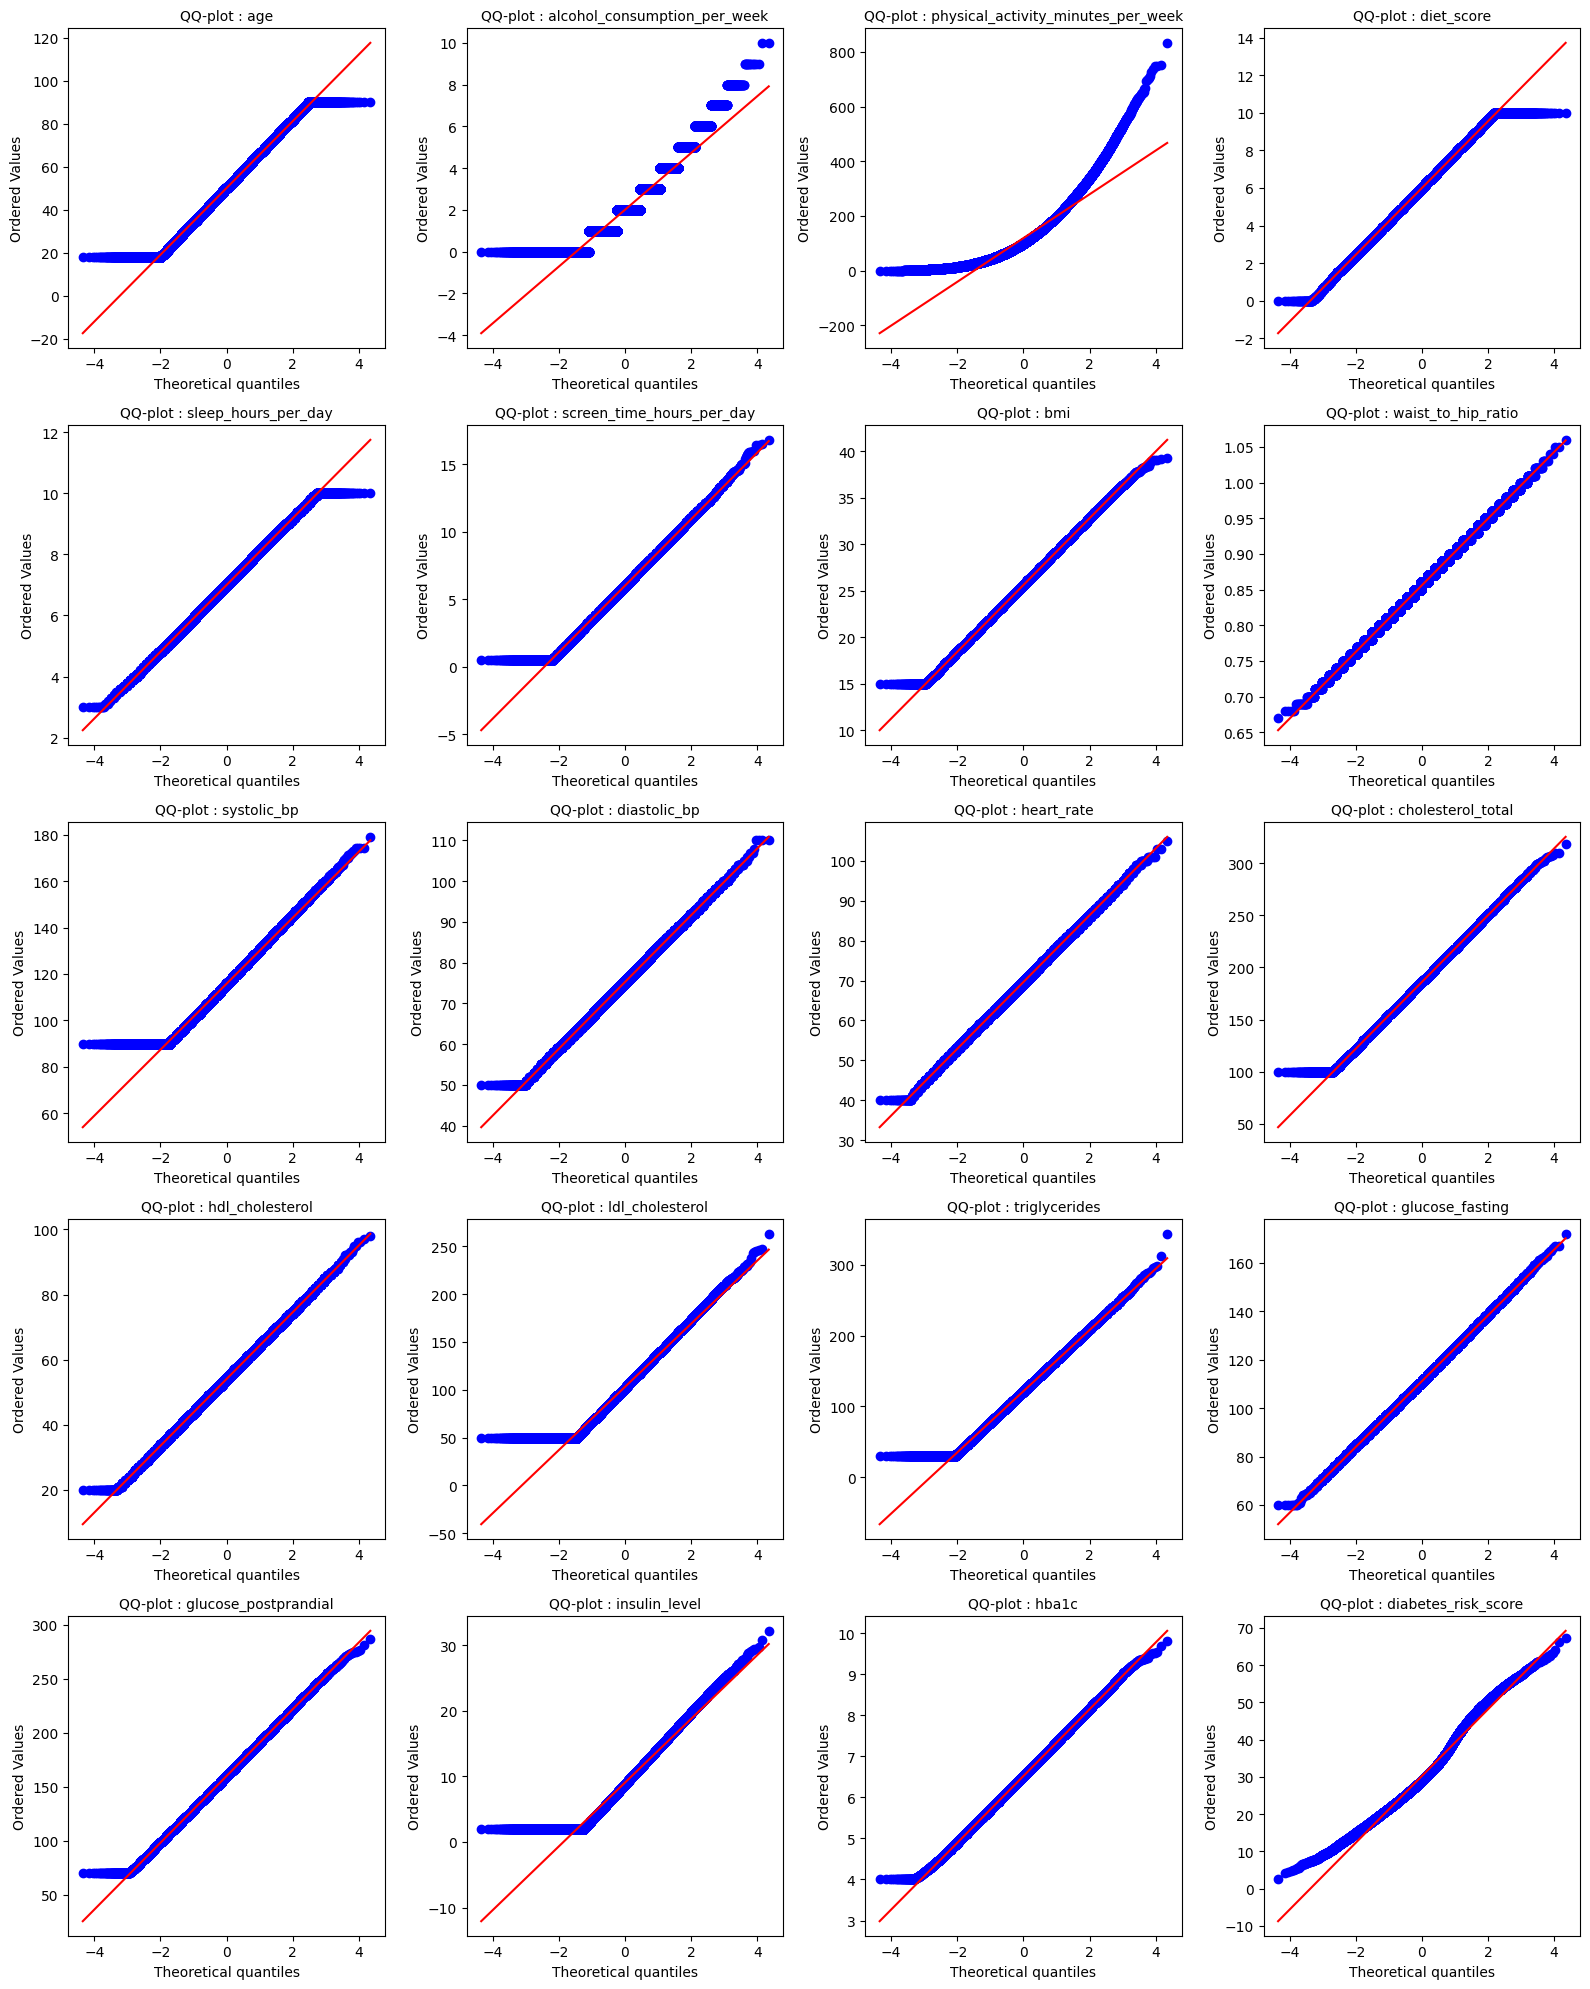

In [29]:
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(4*n_cols, 4*n_rows))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    
    stats.probplot(data[col].dropna(), dist="norm", plot=ax)
    ax.set_title(f"QQ-plot : {col}", fontsize=10)

plt.tight_layout()
plt.savefig('diabetes_qqplots.png', dpi=300)
plt.show()


Les graphiques Quantile-Quantile (Q-Q) sont un outil puissant pour vérifier visuellement si les données suivent une distribution spécifique, généralement la distribution normale. Dans un graphique Q-Q, les quantiles des données sont tracés par rapport aux quantiles d’une distribution théorique. Si les données suivent cette distribution, les points doivent être approximativement alignés sur une ligne droite.
Les écarts significatifs de cette ligne droite, particulièrement dans les extrémités du graphique, peuvent
indiquer la présence de valeurs aberrantes.

In [18]:
from scipy.stats import skew, kurtosis

results = []

for col in cols:
    s = skew(data[col].dropna())
    k = kurtosis(data[col].dropna(), fisher=True)  # Fisher=True → kurtosis normale = 0
    
    results.append({
        "Variable": col,
        "Skewness": s,
        "Kurtosis": k,
        "Skewed?": "Oui" if abs(s) > 1 else "Modéré" if abs(s) > 0.5 else "Symétrique",
        "Leptokurtique?": "Oui" if k > 1 else "Platykurtique" if k < -1 else "Normal"
    })

df_stats = pd.DataFrame(results)
df_stats


Variable  Skewness  Kurtosis     Skewed?  \
0                                  age  0.082685 -0.388248  Symétrique   
1         alcohol_consumption_per_week  0.703333  0.452093      Modéré   
2   physical_activity_minutes_per_week  1.389949  2.811636         Oui   
3                           diet_score -0.070250 -0.219774  Symétrique   
4                  sleep_hours_per_day -0.012613 -0.112264  Symétrique   
5            screen_time_hours_per_day  0.082571 -0.176690  Symétrique   
6                                  bmi  0.006296 -0.056952  Symétrique   
7                   waist_to_hip_ratio  0.005584 -0.014255  Symétrique   
8                          systolic_bp  0.218753 -0.317888  Symétrique   
9                         diastolic_bp  0.007074 -0.037513  Symétrique   
10                          heart_rate -0.016810 -0.021910  Symétrique   
11                   cholesterol_total  0.033571 -0.077768  Symétrique   
12                     hdl_cholesterol -0.002626 -0.007636  Symétrique   
13                     ldl_cholesterol  0.319897 -0.357518  Symétrique   
14                       triglycerides  0.104034 -0.234788  Symétrique   
15                     glucose_fasting  0.046037  0.007177  Symétrique   
16                glucose_postprandial  0.027832 -0.057392  Symétrique   
17                       insulin_level  0.422469 -0.364411  Symétrique   
18                               hba1c  0.031968 -0.059997  Symétrique   
19                 diabetes_risk_score  0.514603 -0.082594      Modéré   

   Leptokurtique?  
0          Normal  
1          Normal  
2             Oui  
3          Normal  
4          Normal  
5          Normal  
6          Normal  
7          Normal  
8          Normal  
9          Normal  
10         Normal  
11         Normal  
12         Normal  
13         Normal  
14         Normal  
15         Normal  
16         Normal  
17         Normal  
18         Normal  
19         Normal

Avant de décider si des transformations de données ou une élimination des valeurs aberrantes sont
nécessaires, il est important de compléter l’analyse par d’autres analyses statistiques, telles que les tests
de Skewness (asymétrie) et de Kurtosis (aplatissement). Ces mesures offrent des indications supplémentaires sur la forme de la distribution des données. Par exemple, une Skewness élevée peut indiquer une
distribution asymétrique, tandis qu’une Kurtosis élevée peut suggérer une distribution à queues lourdes,
deux indices qui pointent vers la présence de valeurs aberrantes.

#### Skewness (asymétrie)
- ≈ 0 → distribution symétrique
- entre 0.5 et 1 → asymétrie modérée
- \>1 → asymétrie forte
- \>2 → transformation recommandée (log, sqrt…)

#### Kurtosis (aplatissement)
- ≈ 0 → distribution normale
- \>1 → leptokurtique (pics + queues épaisses)
- \<-1 → platykurtique (aplatie)

L'analyse des coefficients d'asymétrie (Skewness) et d'aplatissement (Kurtosis) révèle que la grande majorité de nos variables (incluant l'âge, l'IMC, le ratio taille-hanche, la pression artérielle, ainsi que les marqueurs glycémiques (glucose, HbA1c) et lipidiques) présentent une distribution qualifiée de « Symétrique » et « Normale ». Comme le confirment les graphiques Q-Q, les points de ces variables suivent fidèlement la ligne rouge de référence, indiquant une normalité satisfaisante et une absence de distorsion majeure. Pour ces variables, le traitement des valeurs aberrantes n'est pas une nécessité statistique immédiate.

Cependant, une exception notable se détache : l'activité physique (physical_activity_minutes_per_week). Cette variable affiche une Skewness élevée (1.40) et une Kurtosis forte (2.81), la classant comme « Leptokurtique ». Cela traduit une distribution fortement asymétrique avec des queues lourdes, visible également sur son graphique Q-Q qui s'incurve nettement. De manière similaire, mais plus atténuée, la consommation d'alcool et le score de risque de diabète montrent une asymétrie modérée qui mérite une attention particulière.

Il est néanmoins crucial de contextualiser ces observations statistiques. Dans le domaine biomédical, les diagrammes en boîte montrent de nombreuses valeurs considérées comme aberrantes (points au-delà des moustaches), notamment pour l'insuline, le glucose ou la pression artérielle. Or, ces valeurs extrêmes ne sont pas nécessairement des erreurs ; elles reflètent souvent des états pathologiques réels (hyperglycémie sévère, hypertension) propres à la population diabétique étudiée.

En conclusion, en croisant la normalité globale observée sur les graphiques Q-Q et la présence d'outliers sur les boxplots, nous optons pour une gestion ciblée. Nous ne supprimerons pas systématiquement les valeurs extrêmes, car elles contiennent une information clinique précieuse. Nous vérifierons plutôt si ces valeurs dépassent les seuils biologiques possibles (bornes de plausibilité physiologique). Si tel est le cas, elles seront remplacées par les valeurs limites de ces plages, garantissant ainsi la qualité des données sans occulter la réalité médicale des patients à risque.

On effectue un k-means pour voir comment se regroupent les données

Variance expliquée : [0.18501391 0.11125332]


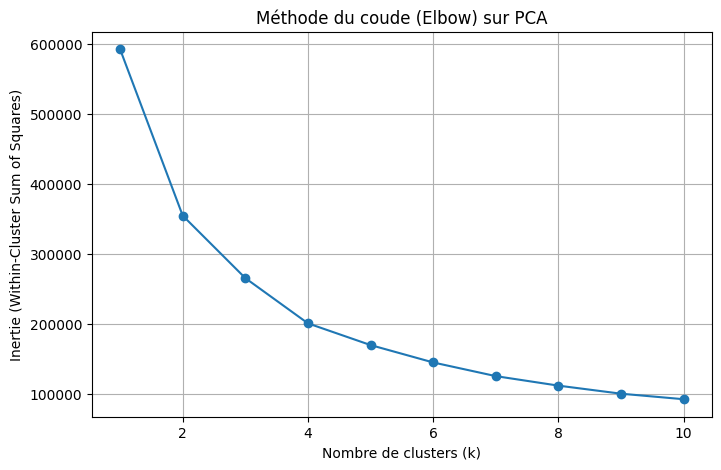

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# -----------------------------
# 1. Séparation des variables
# -----------------------------
qual_cols = list(mappings.keys())   # transforme les keys en liste

X = data_cat[cols]

# -----------------------------
# 2. Standardisation
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3. PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
})

# Ajouter chaque variable qualitative au dataframe PCA
for col in qual_cols:
    df_pca[col] = data[col].values

print("Variance expliquée :", pca.explained_variance_ratio_)

# -----------------------------
# 4. Elbow Method
# -----------------------------

inertias = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (Within-Cluster Sum of Squares)')
plt.title('Méthode du coude (Elbow) sur PCA')
plt.grid(True)
plt.show()


La méthode du coude nous indique un k optimal de 3 clusters.

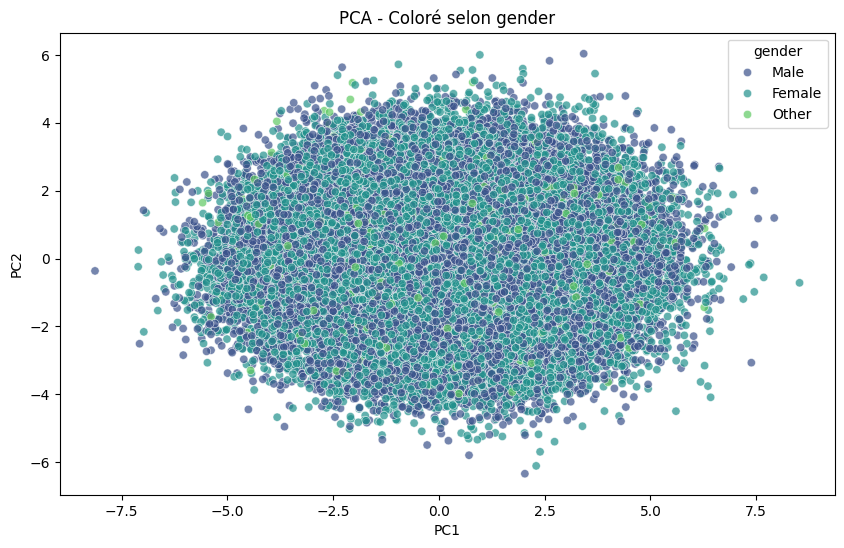

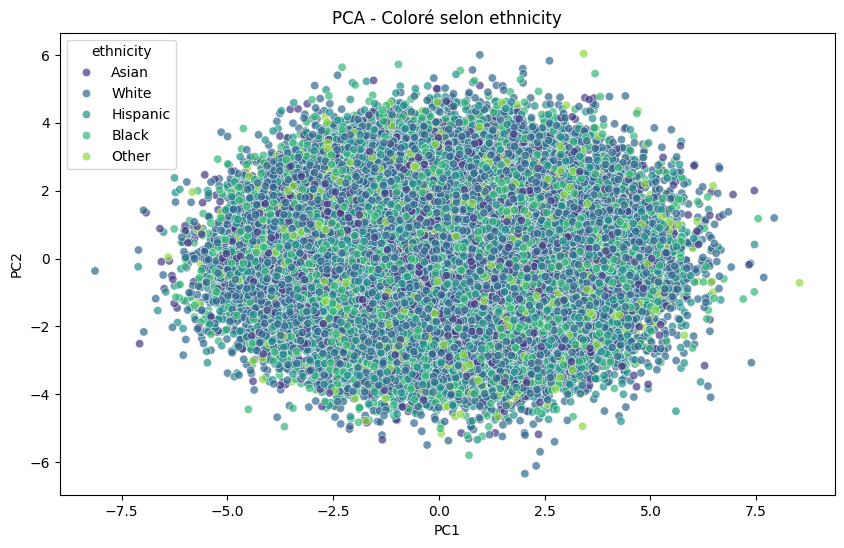

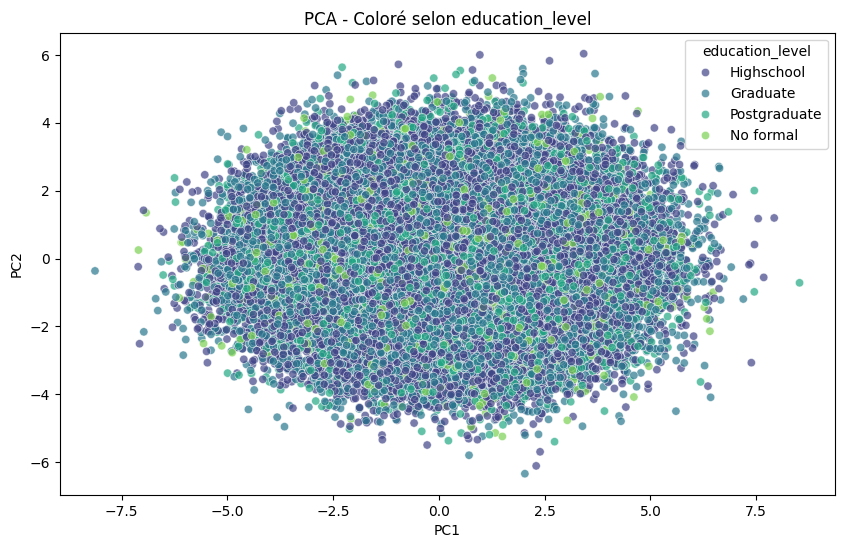

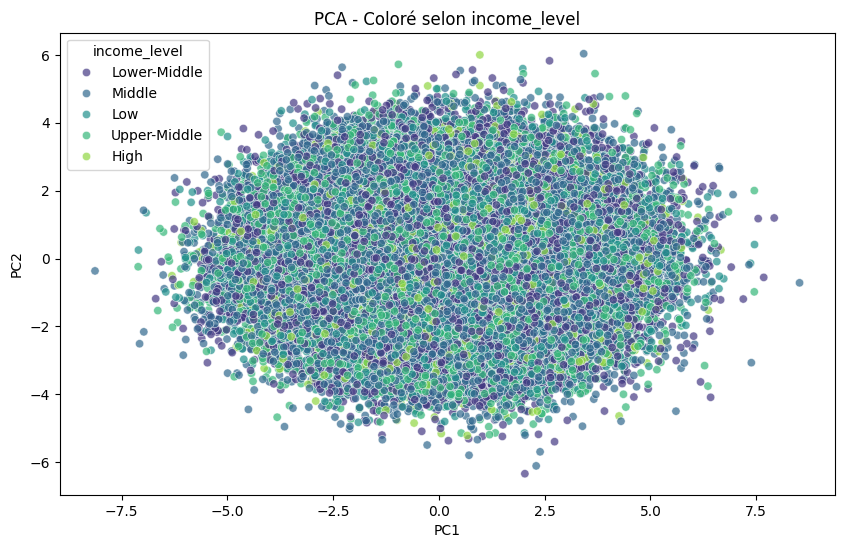

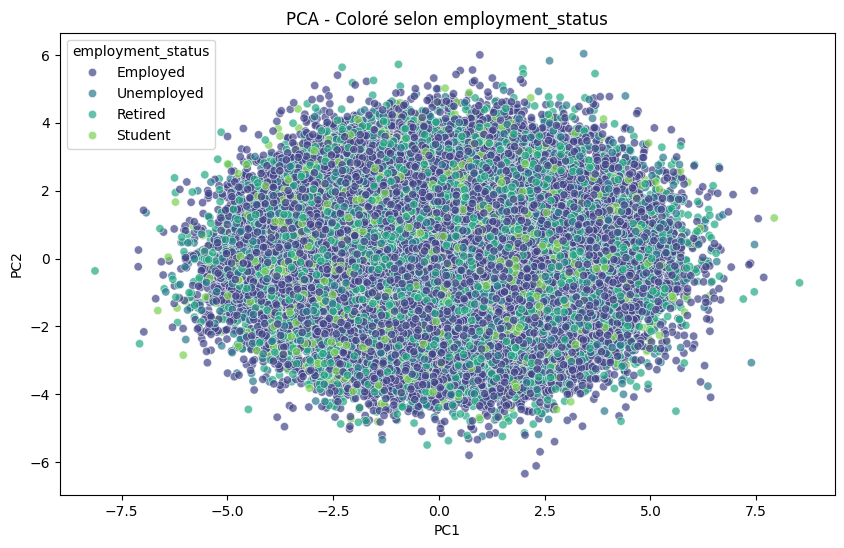

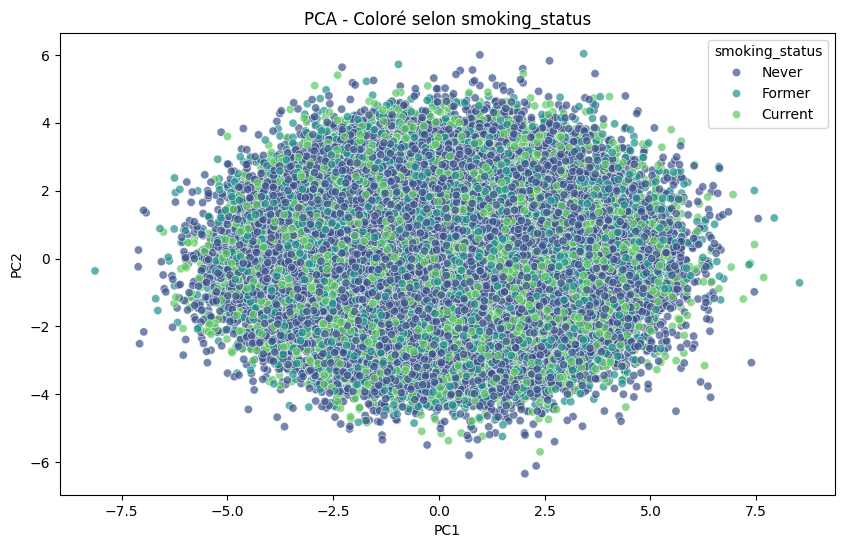

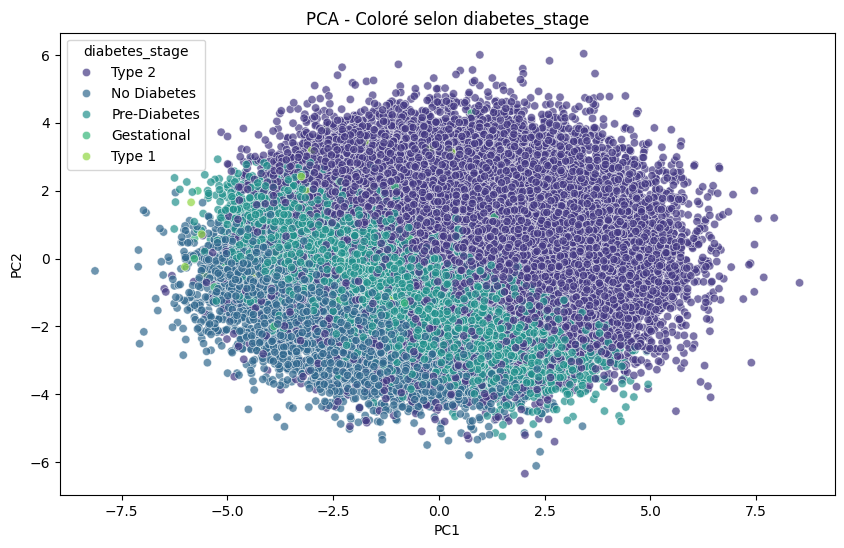

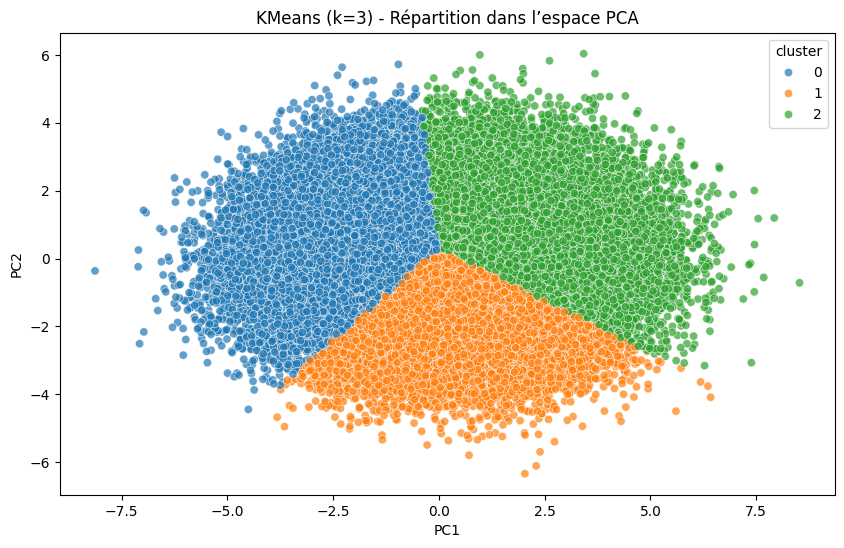

In [20]:
# -----------------------------
# 5. KMeans sur les PCs
# -----------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_pca)

df_pca["cluster"] = clusters

# -----------------------------
# 6. PCA colored by qualitative variable
# -----------------------------

for c in qual_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_pca,
        x="PC1", y="PC2",
        hue=c,
        palette="viridis",
        alpha=0.7
    )
    plt.title(f"PCA - Coloré selon {c}")
    plt.show()

# -----------------------------
# 7. PCA colored by KMeans clusters
# -----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("KMeans (k=3) - Répartition dans l’espace PCA")
plt.show()



In [21]:
cluster_means = data_cat.join(df_pca["cluster"]).groupby("cluster").mean()
cluster_means.T


cluster                                      0           1           2
age                                  42.226534   52.262578   57.157228
gender                                0.522121    0.512872    0.517872
ethnicity                             2.524663    2.536838    2.539825
education_level                       1.004389    0.995100    0.999665
income_level                          2.504644    2.504548    2.492114
employment_status                     0.699676    0.700970    0.693612
smoking_status                        1.409362    1.388481    1.388747
alcohol_consumption_per_week          1.971175    2.028429    2.018177
physical_activity_minutes_per_week  131.573375  128.191219   96.090214
diet_score                            6.383762    5.756312    5.768615
sleep_hours_per_day                   6.998183    6.999124    6.996218
screen_time_hours_per_day             5.971571    5.859699    6.148855
family_history_diabetes               0.142414    0.116772    0.400104
hypertension_history                  0.212162    0.256201    0.289855
cardiovascular_history                0.060862    0.081160    0.098283
bmi                                  23.065361   27.550133   26.752926
waist_to_hip_ratio                    0.826795    0.879657    0.868002
systolic_bp                         108.584964  119.144866  120.972415
diastolic_bp                         73.056045   76.537878   76.524266
heart_rate                           69.236009   69.201121   70.475977
cholesterol_total                   167.242272  201.652435  193.073529
hdl_cholesterol                      57.299307   51.689256   52.473115
ldl_cholesterol                      81.885448  120.661498  111.000152
triglycerides                       103.693413  135.131440  129.277707
glucose_fasting                     105.495463  104.947773  123.108513
glucose_postprandial                150.654980  141.475951  187.540799
insulin_level                         7.124016   10.496086    9.963455
hba1c                                 6.241287    6.024052    7.289302
diabetes_risk_score                  24.448433   30.173608   36.834950
diabetes_stage                        2.796189    2.598228    3.935270
diagnosed_diabetes                    0.464818    0.359984    0.971441

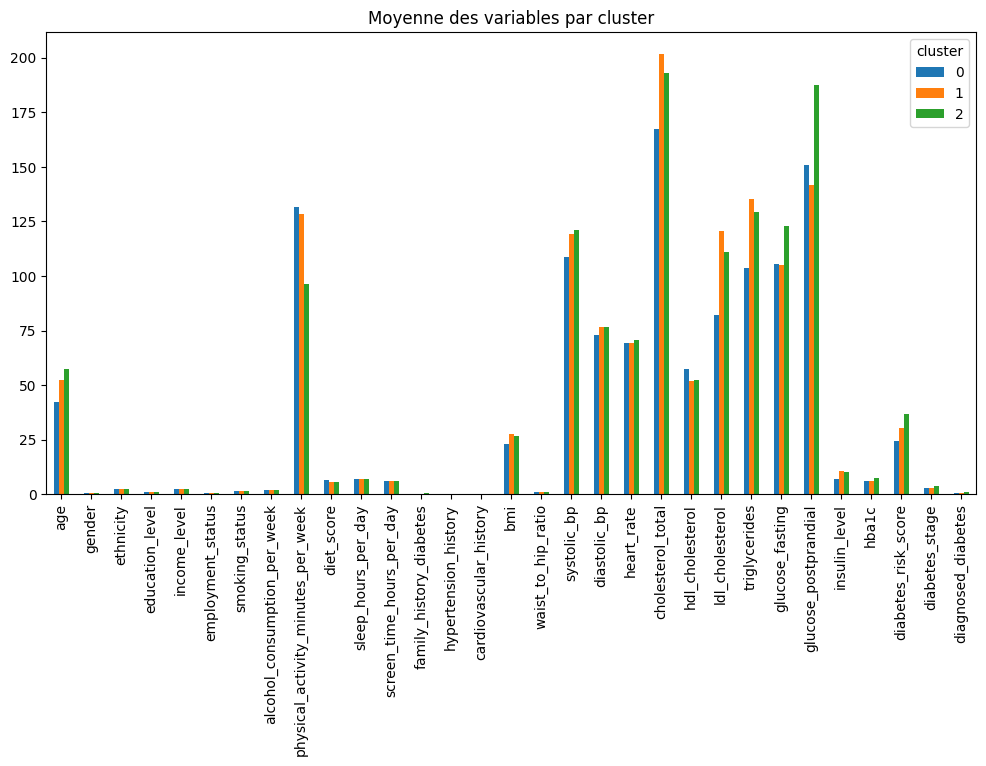

In [22]:
cluster_means.T.plot(kind="bar", figsize=(12,6))
plt.title("Moyenne des variables par cluster")
plt.xticks(rotation=90)
plt.show()


In [23]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=cols
)
loadings


PC1       PC2
age                                 0.269748 -0.033227
alcohol_consumption_per_week        0.011592 -0.009676
physical_activity_minutes_per_week -0.115483 -0.112458
diet_score                         -0.105705  0.064926
sleep_hours_per_day                 0.000998  0.001564
screen_time_hours_per_day           0.017554  0.032904
bmi                                 0.319348 -0.291356
waist_to_hip_ratio                  0.276299 -0.271736
systolic_bp                         0.251603 -0.104340
diastolic_bp                        0.125615 -0.079710
heart_rate                          0.038520  0.047103
cholesterol_total                   0.251434 -0.266331
hdl_cholesterol                    -0.145684  0.123752
ldl_cholesterol                     0.273562 -0.285665
triglycerides                       0.182774 -0.169023
glucose_fasting                     0.324328  0.371159
glucose_postprandial                0.286740  0.462972
insulin_level                       0.177623 -0.155664
hba1c                               0.311882  0.474408
diabetes_risk_score                 0.366712  0.069647

In [27]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=cols
)
loadings


PC1       PC2
age                                 0.269748 -0.033227
alcohol_consumption_per_week        0.011592 -0.009676
physical_activity_minutes_per_week -0.115483 -0.112458
diet_score                         -0.105705  0.064926
sleep_hours_per_day                 0.000998  0.001564
screen_time_hours_per_day           0.017554  0.032904
bmi                                 0.319348 -0.291356
waist_to_hip_ratio                  0.276299 -0.271736
systolic_bp                         0.251603 -0.104340
diastolic_bp                        0.125615 -0.079710
heart_rate                          0.038520  0.047103
cholesterol_total                   0.251434 -0.266331
hdl_cholesterol                    -0.145684  0.123752
ldl_cholesterol                     0.273562 -0.285665
triglycerides                       0.182774 -0.169023
glucose_fasting                     0.324328  0.371159
glucose_postprandial                0.286740  0.462972
insulin_level                       0.177623 -0.155664
hba1c                               0.311882  0.474408
diabetes_risk_score                 0.366712  0.069647

Les données ne semblent pas former de cluster particulier selon les variables qualitatives, ce qui suggère que les variables qualitatives n'ont pas une influence marquée sur la structure des données dans l'espace des composantes principales. En effet l'axe 1 est principalement influencé par des variables quantitatives telles que l'IMC (BMI) ou encore la glycémie à jeun (glucose fasting) (variables qui ont un loading (poids) plus élevé), ce qui laisse penser que les cluster correspondent davanantage à des critères de "bonne santé".